✅ Dataset loaded successfully

📌 Shape of dataset: (891, 12)

📌 Data Types:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

📌 Missing Values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

📌 Statistical Summary:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   


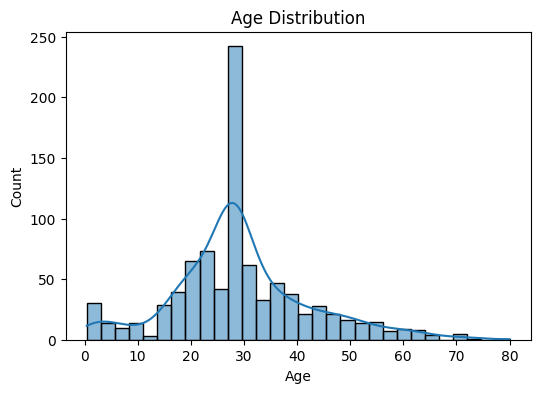

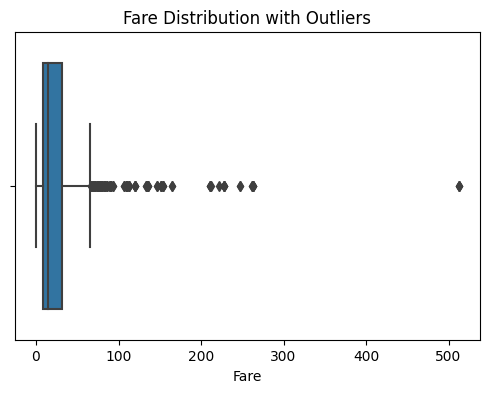

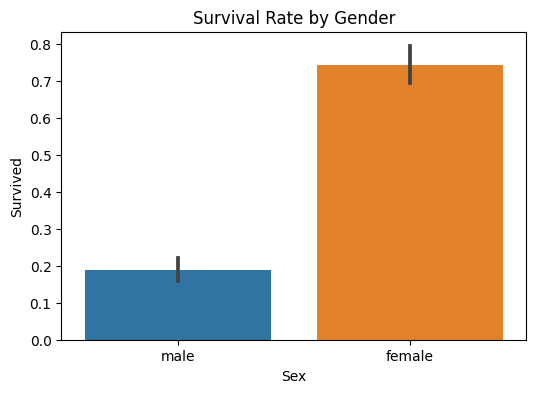

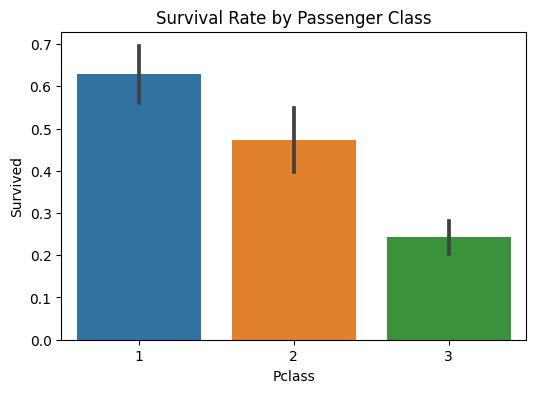

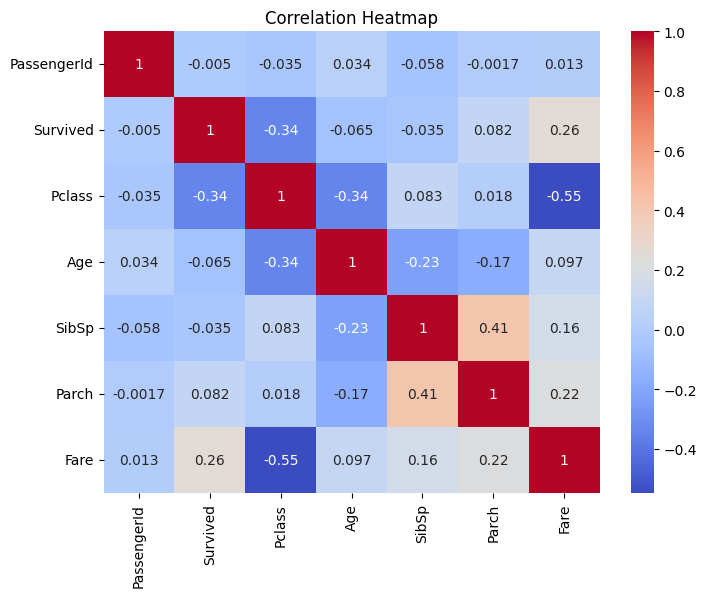

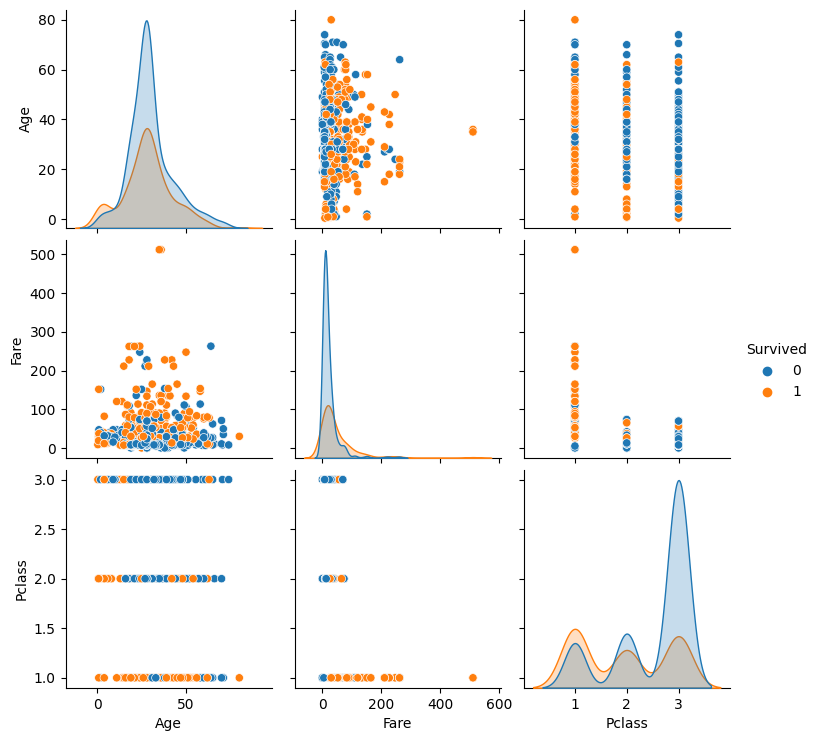


📊 Key Insights:
1. Females had a much higher survival rate than males.
2. Passengers in 1st class had the highest survival rate, 3rd class the lowest.
3. Most passengers were aged 20–40 years.
4. Fare distribution shows extreme outliers — some passengers paid very high fares.
5. Class and gender are the strongest survival indicators; age and fare have weaker influence.



In [1]:
# Titanic EDA - Internship Task

# =========================
# 1. Import Libraries
# =========================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Display all columns in output
pd.set_option('display.max_columns', None)

# =========================
# 2. Load Dataset
# =========================
df = pd.read_csv("train.csv")
print("✅ Dataset loaded successfully")
df.head()

# =========================
# 3. Basic Info
# =========================
print("\n📌 Shape of dataset:", df.shape)
print("\n📌 Data Types:")
print(df.dtypes)
print("\n📌 Missing Values:")
print(df.isnull().sum())

# =========================
# 4. Statistical Summary
# =========================
print("\n📌 Statistical Summary:")
print(df.describe())

# =========================
# 5. Value Counts for Categorical Columns
# =========================
print("\n📌 Gender counts:\n", df['Sex'].value_counts())
print("\n📌 Embarked counts:\n", df['Embarked'].value_counts())

# =========================
# 6. Data Cleaning
# =========================
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop(columns=['Cabin'], inplace=True)

print("\n📌 Missing Values after cleaning:")
print(df.isnull().sum())

# =========================
# 7. Univariate Analysis
# =========================
plt.figure(figsize=(6,4))
sns.histplot(df['Age'], kde=True)
plt.title("Age Distribution")
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x=df['Fare'])
plt.title("Fare Distribution with Outliers")
plt.show()

# =========================
# 8. Bivariate Analysis
# =========================
plt.figure(figsize=(6,4))
sns.barplot(x='Sex', y='Survived', data=df)
plt.title("Survival Rate by Gender")
plt.show()

plt.figure(figsize=(6,4))
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title("Survival Rate by Passenger Class")
plt.show()

# =========================
# 9. Correlation Heatmap
# =========================
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# =========================
# 10. Pairplot
# =========================
sns.pairplot(df[['Survived','Age','Fare','Pclass']], hue='Survived')
plt.show()

# =========================
# 11. Summary of Findings
# =========================
summary = """
📊 Key Insights:
1. Females had a much higher survival rate than males.
2. Passengers in 1st class had the highest survival rate, 3rd class the lowest.
3. Most passengers were aged 20–40 years.
4. Fare distribution shows extreme outliers — some passengers paid very high fares.
5. Class and gender are the strongest survival indicators; age and fare have weaker influence.
"""
print(summary)
